In [1]:
import torch
from train.model import MNISTNeuralNet
import mlflow
from torchinfo import summary
from train.hyperparams import params

In [2]:

trackinguri = "http://127.0.0.1:5000/"

mlflow.set_tracking_uri(trackinguri)
client = mlflow.MlflowClient(tracking_uri=trackinguri)


In [3]:
mnist_model = MNISTNeuralNet(hidden_dim=params["hidden_dim"],dropout_prob=params["dropout_prob"])


In [10]:
MLFLOW_EXPERIMENT_NAME = "Digit-Recognition"

In [11]:
experiment = mlflow.get_experiment_by_name(MLFLOW_EXPERIMENT_NAME)
exp_id = experiment.experiment_id if experiment else mlflow.create_experiment(MLFLOW_EXPERIMENT_NAME)
 


In [12]:
exp_id

'315412815950267867'

In [13]:
model_path = 'mlflow-artifacts:/315412815950267867/cbabe04a2e3d40b08ea4bfcefbf4210e/artifacts/model_weights/mnist_model_state_dict.pth'

In [14]:
ml_path = mlflow.artifacts.download_artifacts(model_path,dst_path='/statedict')

In [15]:
ml_path

'd:\\statedict\\mnist_model_state_dict.pth'

In [16]:
state_dict = torch.load(ml_path)
mnist_model.load_state_dict(state_dict)
mnist_model = mnist_model.eval()

MNISTNeuralNet(
  (conv): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): Dropout2d(p=0.2, inplace=True)
    (2): LeakyReLU(negative_slope=0.02, inplace=True)
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1))
    (6): Dropout2d(p=0.4, inplace=True)
    (7): LeakyReLU(negative_slope=0.02, inplace=True)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (11): Dropout2d(p=0.2, inplace=True)
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear): Sequential(
    (0): Linear(in_features=1024, out_features=400, bias=True)
    (1): LeakyReLU(negative_slop

In [17]:
from train.DataLoader import train_val_dataloader

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4372982.03it/s]


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 135315.70it/s]


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 236906.66it/s]


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



In [18]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [19]:
train_dataloader, val_dataloader = train_val_dataloader(batch_size=32)

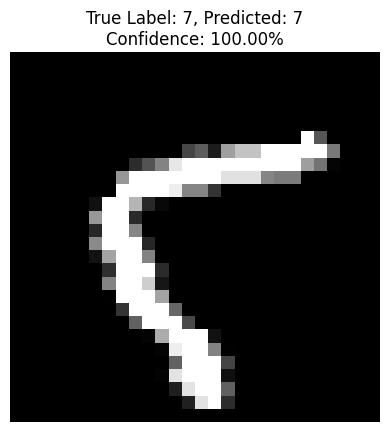

In [61]:

def predict(model):

    import random

    # Get one batch from the validation dataloader
    images, labels = next(iter(val_dataloader))

    # Select a random index within the batch
    random_index = random.randint(0, images.size(0) - 1)

    # Extract the random image and its label
    image = images[random_index]
    true_label = labels[random_index]


    # Perform inference
    with torch.no_grad():
        output = model(image.unsqueeze(0))  # Add batch dimension
        predicted_label = torch.argmax(output, dim=1)
        confidence = output[0][predicted_label].item()*100  # Confidence of the predicted label


    # Display the image and inference result
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"True Label: {true_label.item()}, Predicted: {predicted_label.item()}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

In [ ]:
predict(model=mnist_model)

## **Load Staged Model for Inference**

In [4]:
model_name = "MNISTDigitRecognition"
stage = "production" 

latest_versions = client.get_latest_versions(name=model_name, stages=[stage])


C:\Users\sushovan.saha\AppData\Local\Temp\ipykernel_21740\1847435033.py:4: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest_versions = client.get_latest_versions(name=model_name, stages=[stage])


In [8]:
latest_versions[0]

<ModelVersion: aliases=[], creation_timestamp=1736939488720, current_stage='Production', description='', last_updated_timestamp=1736939506142, name='MNISTDigitRecognition', run_id='dd78a646e90c4e2496137d058c106890', run_link='', source='mlflow-artifacts:/128068796111150865/dd78a646e90c4e2496137d058c106890/artifacts/mymodel', status='READY', status_message='', tags={}, user_id='', version='1'>

In [9]:
latest_version = latest_versions[0]
model_version = latest_version.version
run_id = latest_version.run_id

In [10]:
artifact_uri = client.get_run(run_id).info.artifact_uri

In [11]:
artifact_uri

'mlflow-artifacts:/128068796111150865/dd78a646e90c4e2496137d058c106890/artifacts'

In [12]:
model_path = mlflow.artifacts.download_artifacts(artifact_uri=artifact_uri,
                                                 dst_path='D:/Python/mlflow/Digit-Recognition-App-main/statedict')


C:\Users\sushovan.saha\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
ml_path = 'statedict/artifacts/model_weights/mnist_model_state_dict.pth'

In [32]:
state_dict = torch.load(ml_path)
mnist_model.load_state_dict(state_dict)
model = mnist_model.eval()

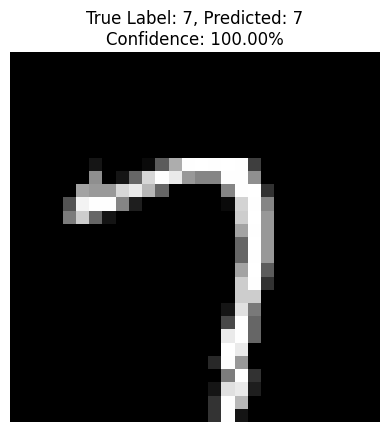

In [43]:
predict(model=model)